# Heart Disease Prediction using Neural Networks

## Complete Demo of Neural Network Architectures, Optimizers, and Activation Functions

This notebook demonstrates:
- Different numbers of hidden layers
- Different depths of hidden layers
- Different optimization algorithms (Adam vs Gradient Descent)
- Different activation functions
- Impact of batch sizes and epochs
- Comprehensive visualizations and comparisons

## 1. Import Required Libraries

In [10]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, History

# Machine Learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")

TensorFlow version: 2.20.0
Libraries imported successfully!


## 2. Load and Explore the Dataset

In [11]:
# Load the dataset
df = pd.read_csv('data/Heart_Disease_Prediction.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (270, 14)

First few rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [12]:
# Display dataset information
print("Dataset Information:")
print(df.info())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: fl

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


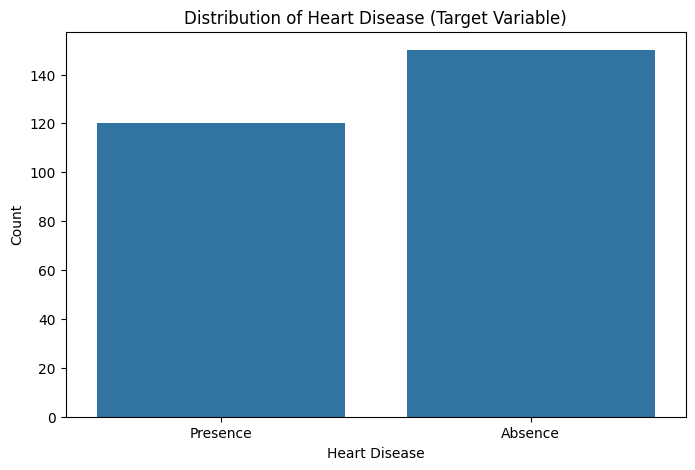


Target Variable Distribution:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Class Balance: Heart Disease
Absence     0.556
Presence    0.444
Name: proportion, dtype: float64


In [13]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
target_col = df.columns[-1]  # Assuming last column is target
sns.countplot(data=df, x=target_col)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

print(f"\nTarget Variable Distribution:")
print(df[target_col].value_counts())
print(f"\nClass Balance: {df[target_col].value_counts(normalize=True).round(3)}")

## 3. Data Preprocessing

In [19]:
# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target if it's categorical (Presence/Absence to 1/0)
if y.dtype == 'object' or y.dtype.name == 'category':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(f"Target variable encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Number of features:", X.shape[1])
print(f"Target values: {np.unique(y)}")

Target variable encoded: {'Absence': np.int64(0), 'Presence': np.int64(1)}
Features shape: (270, 13)
Target shape: (270,)
Number of features: 13
Target values: [0 1]


In [20]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed!")
print("\nScaled features statistics:")
print(f"Mean: {X_scaled.mean(axis=0).round(3)}")
print(f"Std: {X_scaled.std(axis=0).round(3)}")

Feature scaling completed!

Scaled features statistics:
Mean: [ 0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0.  0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4. Split Data into Training and Testing Sets

In [21]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nTraining set target distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set target distribution:")
print(pd.Series(y_test).value_counts())

Training set size: (216, 13)
Testing set size: (54, 13)

Training set target distribution:
0    120
1     96
Name: count, dtype: int64

Test set target distribution:
0    30
1    24
Name: count, dtype: int64


## 5. Build Simple Baseline Neural Network

In [ ]:
# Create a simple baseline neural network
baseline_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu', name='hidden_layer_1'),
    Dense(16, activation='relu', name='hidden_layer_2'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("Baseline Neural Network Architecture:")
print("="*70)
baseline_model.summary()
print("="*70)



Baseline Neural Network Architecture:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the baseline model
print("\nTraining baseline model...\n")

baseline_history = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

print("\nBaseline model training completed!")




Training baseline model...

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6395 - loss: 0.6360 - val_accuracy: 0.6591 - val_loss: 0.6252
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7384 - loss: 0.5906 - val_accuracy: 0.6818 - val_loss: 0.5939
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7616 - loss: 0.5523 - val_accuracy: 0.6818 - val_loss: 0.5676
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7849 - loss: 0.5187 - val_accuracy: 0.6818 - val_loss: 0.5456
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7907 - loss: 0.4885 - val_accuracy: 0.6818 - val_loss: 0.5270
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7965 - loss: 0.4615 - val_accuracy: 0.7273 - val_loss: 0.5117
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8081 - loss: 0.4373 - val_accuracy: 0.7273 - val_loss: 0.4993
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8256 - loss: 0.4155 - val

In [49]:
# Evaluate baseline model on test set
baseline_loss, baseline_acc = baseline_model.evaluate(X_test, y_test)
baseline_pred_proba = baseline_model.predict(X_test)
baseline_pred = (baseline_pred_proba > 0.5).astype(int)

print("\n" + "="*70)
print("BASELINE MODEL EVALUATION")
print("="*70)
print(f"Test Loss: {baseline_loss:.4f}")
print(f"Test Accuracy: {baseline_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, baseline_pred, target_names=['No Disease', 'Disease']))
print("="*70)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8148 - loss: 0.6961
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

BASELINE MODEL EVALUATION
Test Loss: 0.6961
Test Accuracy: 0.8148

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.77      0.82        30
     Disease       0.75      0.88      0.81        24

    accuracy                           0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



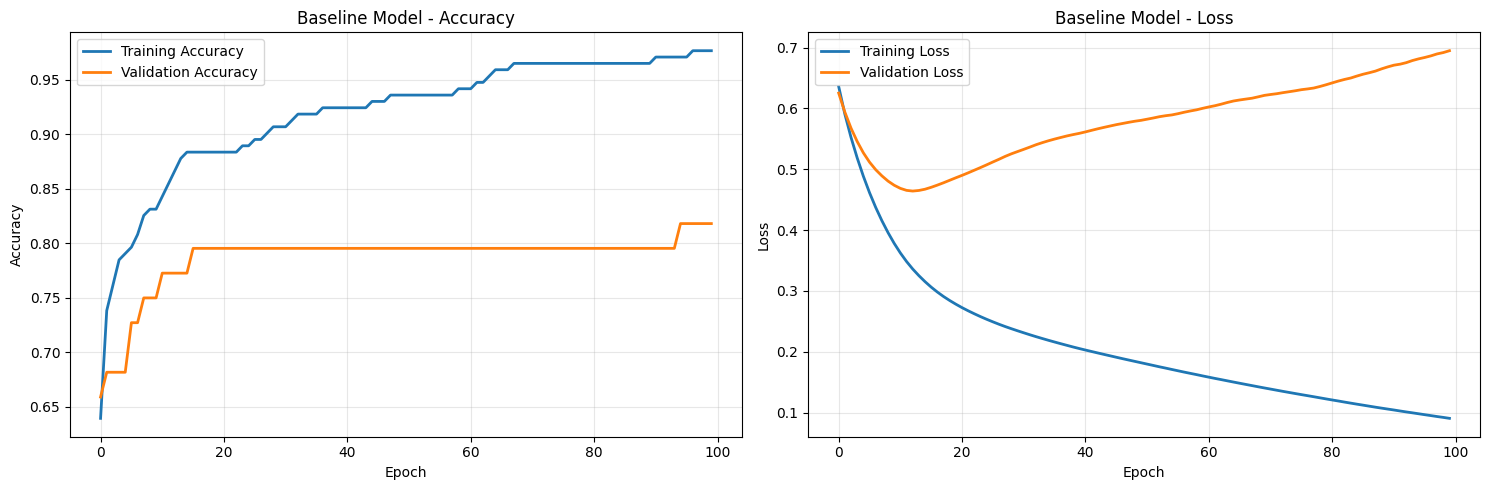


Baseline model performance will serve as our reference for experiments!


In [50]:
# Visualize baseline model training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1 = axes[0]
ax1.plot(baseline_history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Baseline Model - Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2 = axes[1]
ax2.plot(baseline_history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(baseline_history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Baseline Model - Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBaseline model performance will serve as our reference for experiments!")

## 6. Experiment 1: Compare Different Numbers of Hidden Layers

In [51]:
# Function to create models with different numbers of hidden layers
def create_model_layers(n_layers, input_dim, neurons=64, activation='relu', optimizer='adam'):
    model = Sequential()
    
    # Input layer
    model.add(Dense(neurons, input_dim=input_dim, activation=activation))
    
    # Hidden layers
    for i in range(n_layers - 1):
        model.add(Dense(neurons, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

# Test different numbers of layers (1, 2, 3, 4 hidden layers)
layer_configs = [1, 2, 3, 4]
layer_results = {}
layer_histories = {}

print("Training models with different numbers of hidden layers...\n")

for n_layers in layer_configs:
    print(f"Training model with {n_layers} hidden layer(s)...")
    
    model = create_model_layers(
        n_layers=n_layers,
        input_dim=X_train.shape[1],
        neurons=64,
        activation='relu',
        optimizer='adam'
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    layer_results[n_layers] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    layer_histories[n_layers] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}\n")

print("Experiment 1 completed!")

Training models with different numbers of hidden layers...

Training model with 1 hidden layer(s)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
  Test Accuracy: 0.8704

Training model with 2 hidden layer(s)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
  Test Accuracy: 0.8148

Training model with 3 hidden layer(s)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
  Test Accuracy: 0.8333

Training model with 4 hidden layer(s)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
  Test Accuracy: 0.7963

Experiment 1 completed!


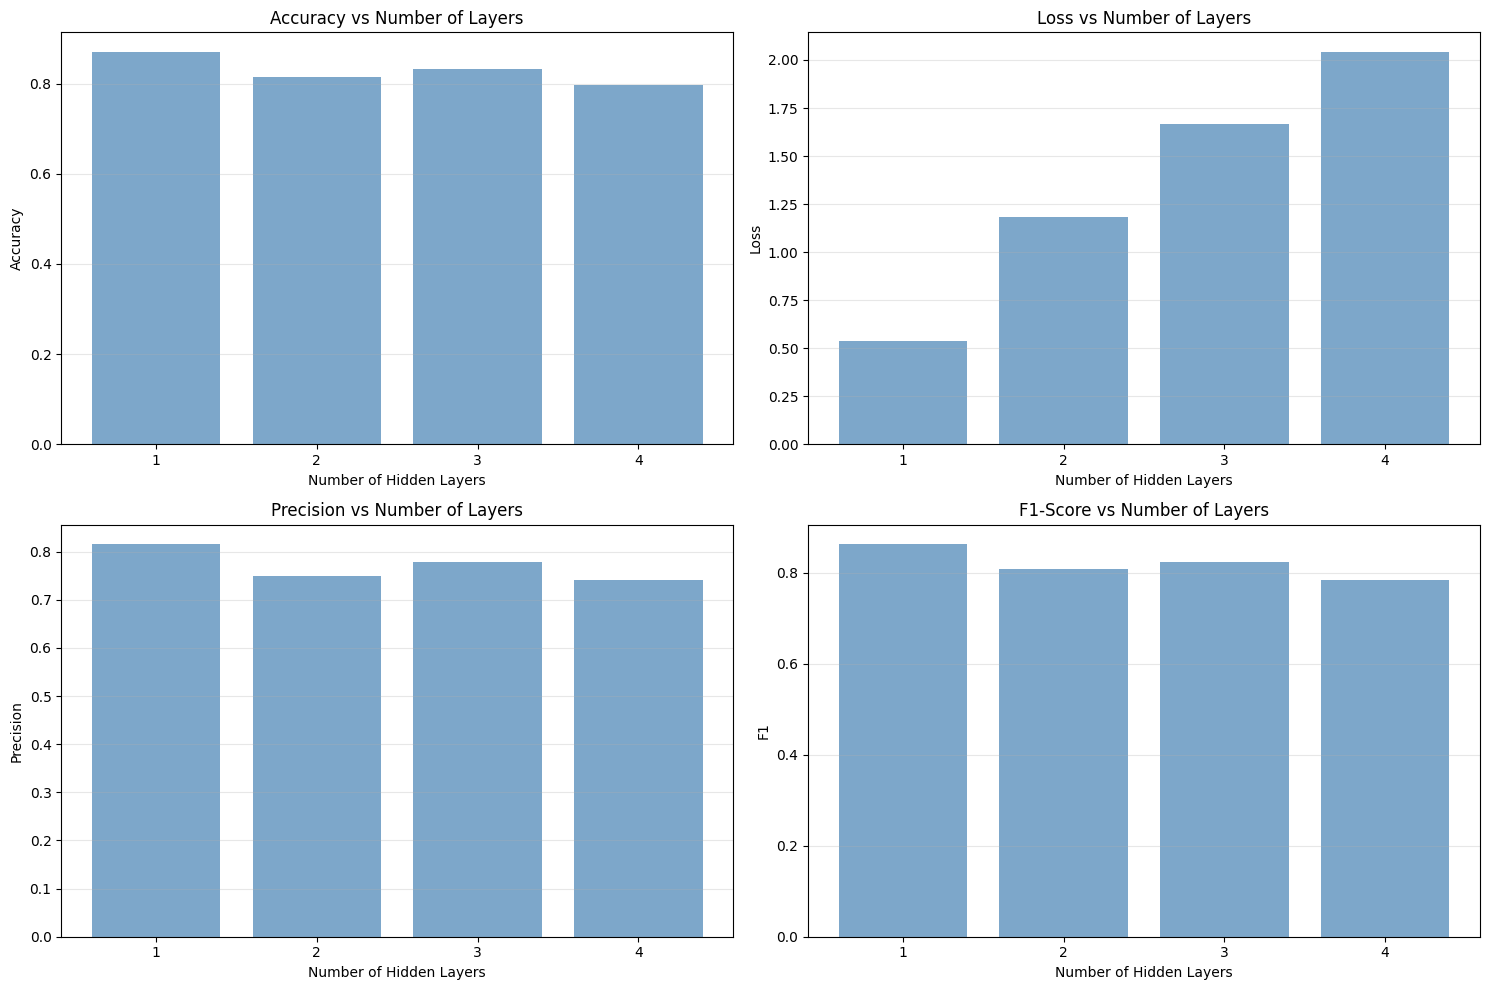


Summary - Number of Hidden Layers:
1 layer(s): Accuracy=0.8704, F1=0.8627
2 layer(s): Accuracy=0.8148, F1=0.8077
3 layer(s): Accuracy=0.8333, F1=0.8235
4 layer(s): Accuracy=0.7963, F1=0.7843


In [52]:
# Visualize results for different layer configurations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['accuracy', 'loss', 'precision', 'f1']
titles = ['Accuracy vs Number of Layers', 'Loss vs Number of Layers', 
          'Precision vs Number of Layers', 'F1-Score vs Number of Layers']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    values = [layer_results[n][metric] for n in layer_configs]
    ax.bar(layer_configs, values, color='steelblue', alpha=0.7)
    ax.set_xlabel('Number of Hidden Layers')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(title)
    ax.set_xticks(layer_configs)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Number of Hidden Layers:")
print("="*70)
for n_layers in layer_configs:
    print(f"{n_layers} layer(s): Accuracy={layer_results[n_layers]['accuracy']:.4f}, "
          f"F1={layer_results[n_layers]['f1']:.4f}")

## 7. Experiment 2: Compare Different Hidden Layer Depths (Neurons)

In [53]:
# Test different neuron counts (16, 32, 64, 128)
neuron_configs = [16, 32, 64, 128]
neuron_results = {}
neuron_histories = {}

print("Training models with different numbers of neurons per layer...\n")

for n_neurons in neuron_configs:
    print(f"Training model with {n_neurons} neurons per layer...")
    
    model = create_model_layers(
        n_layers=2,  # Fixed at 2 layers for this experiment
        input_dim=X_train.shape[1],
        neurons=n_neurons,
        activation='relu',
        optimizer='adam'
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    neuron_results[n_neurons] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    neuron_histories[n_neurons] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}\n")

print("Experiment 2 completed!")

Training models with different numbers of neurons per layer...

Training model with 16 neurons per layer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
  Test Accuracy: 0.8148

Training model with 32 neurons per layer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  Test Accuracy: 0.8148

Training model with 64 neurons per layer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
  Test Accuracy: 0.7963

Training model with 128 neurons per layer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
  Test Accuracy: 0.8148

Experiment 2 completed!


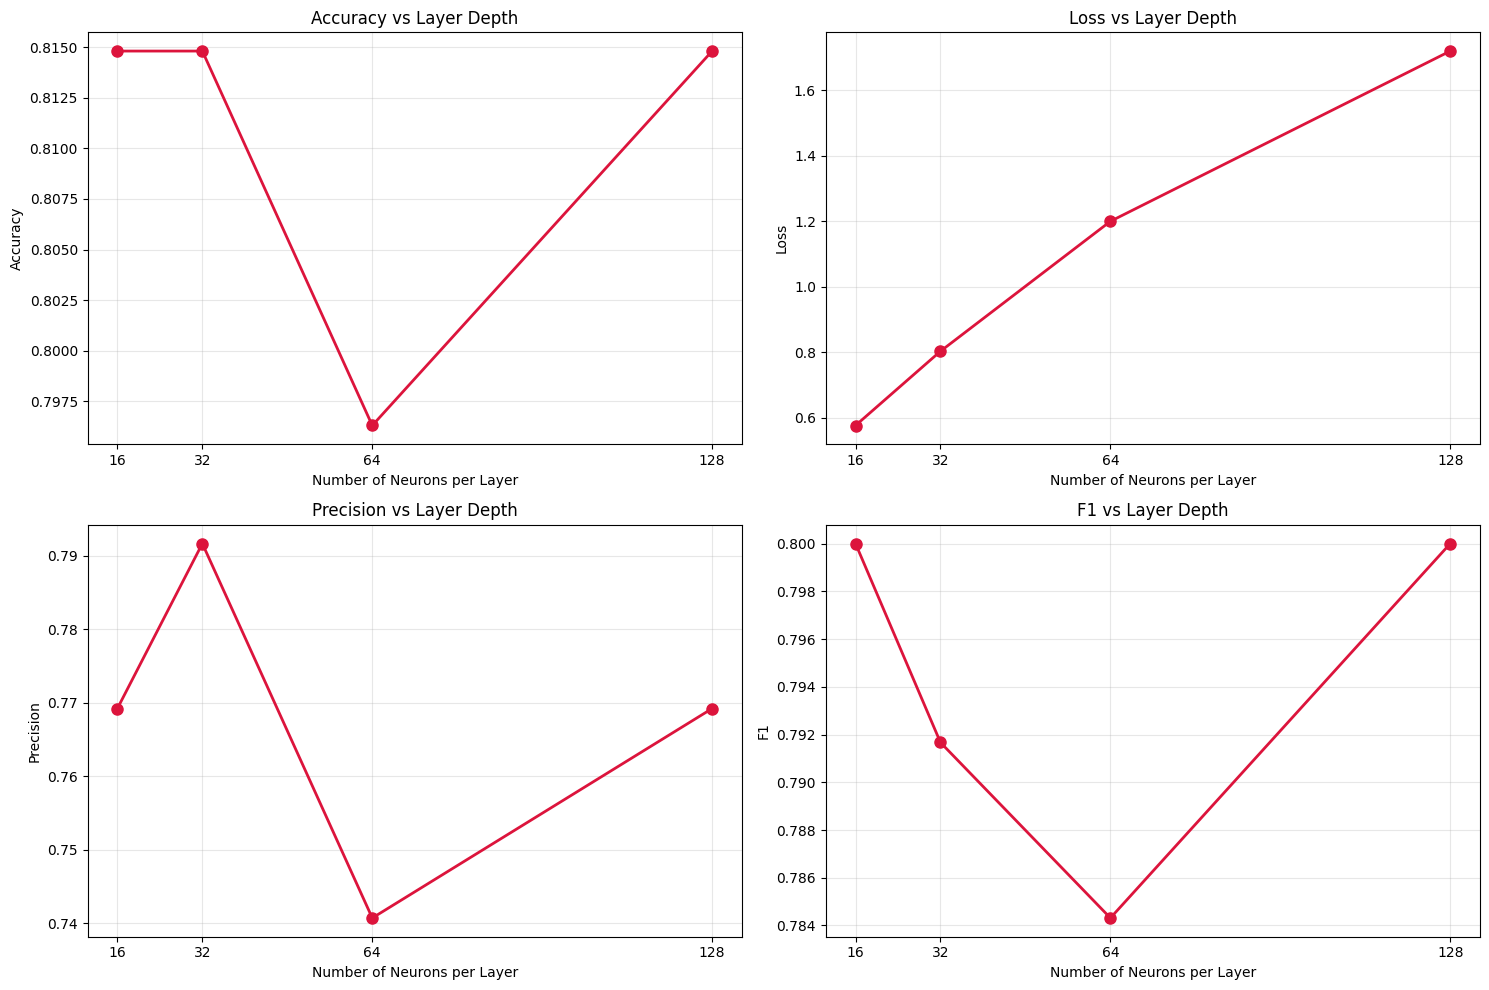


Summary - Number of Neurons per Layer:
16 neurons: Accuracy=0.8148, F1=0.8000
32 neurons: Accuracy=0.8148, F1=0.7917
64 neurons: Accuracy=0.7963, F1=0.7843
128 neurons: Accuracy=0.8148, F1=0.8000


In [54]:
# Visualize results for different neuron configurations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    values = [neuron_results[n][metric] for n in neuron_configs]
    ax.plot(neuron_configs, values, marker='o', linewidth=2, markersize=8, color='crimson')
    ax.set_xlabel('Number of Neurons per Layer')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'{metric.capitalize()} vs Layer Depth')
    ax.set_xticks(neuron_configs)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Number of Neurons per Layer:")
print("="*70)
for n_neurons in neuron_configs:
    print(f"{n_neurons} neurons: Accuracy={neuron_results[n_neurons]['accuracy']:.4f}, "
          f"F1={neuron_results[n_neurons]['f1']:.4f}")

## 8. Experiment 3: Compare Optimizers (Adam vs Gradient Descent/SGD)

In [55]:
# Compare Adam vs SGD (Gradient Descent)
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

optimizer_results = {}
optimizer_histories = {}

print("Training models with different optimizers...\n")

for opt_name, opt in optimizers.items():
    print(f"Training model with {opt_name} optimizer...")
    
    model = create_model_layers(
        n_layers=2,
        input_dim=X_train.shape[1],
        neurons=64,
        activation='relu',
        optimizer=opt
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    optimizer_results[opt_name] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    optimizer_histories[opt_name] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}\n")

print("Experiment 3 completed!")

Training models with different optimizers...

Training model with Adam optimizer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
  Test Accuracy: 0.7963

Training model with SGD optimizer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
  Test Accuracy: 0.8148

Experiment 3 completed!


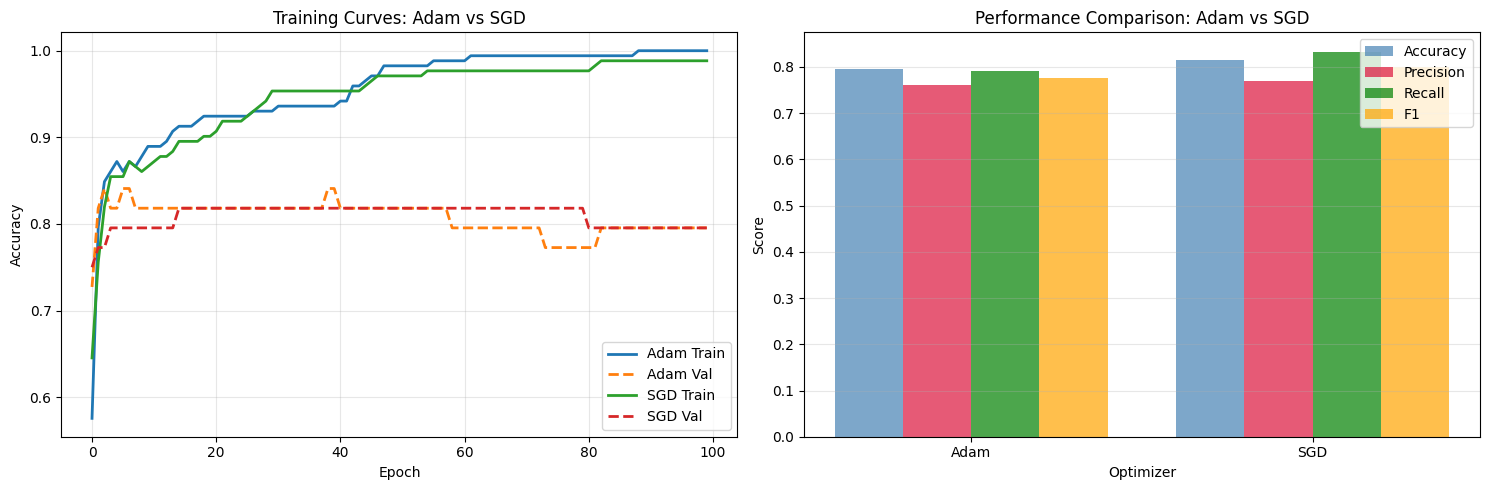


Summary - Optimizers:
Adam: Accuracy=0.7963, F1=0.7755
SGD: Accuracy=0.8148, F1=0.8000


In [56]:
# Visualize optimizer comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training curves
ax1 = axes[0]
for opt_name in optimizers.keys():
    history = optimizer_histories[opt_name]
    ax1.plot(history.history['accuracy'], label=f'{opt_name} Train', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label=f'{opt_name} Val', linestyle='--', linewidth=2)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training Curves: Adam vs SGD')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Performance comparison
ax2 = axes[1]
opt_names = list(optimizers.keys())
x = np.arange(len(opt_names))
width = 0.2

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
colors = ['steelblue', 'crimson', 'green', 'orange']

for i, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    values = [optimizer_results[opt][metric] for opt in opt_names]
    ax2.bar(x + i*width, values, width, label=metric.capitalize(), color=color, alpha=0.7)

ax2.set_xlabel('Optimizer')
ax2.set_ylabel('Score')
ax2.set_title('Performance Comparison: Adam vs SGD')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(opt_names)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Optimizers:")
print("="*70)
for opt_name in optimizers.keys():
    print(f"{opt_name}: Accuracy={optimizer_results[opt_name]['accuracy']:.4f}, "
          f"F1={optimizer_results[opt_name]['f1']:.4f}")

## 9. Experiment 4: Compare Activation Functions

In [57]:
# Compare different activation functions
activations = ['relu', 'sigmoid', 'tanh']
activation_results = {}
activation_histories = {}

print("Training models with different activation functions...\n")

for activation in activations:
    print(f"Training model with {activation} activation...")
    
    model = create_model_layers(
        n_layers=2,
        input_dim=X_train.shape[1],
        neurons=64,
        activation=activation,
        optimizer='adam'
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    activation_results[activation] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    activation_histories[activation] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}\n")

print("Experiment 4 completed!")

Training models with different activation functions...

Training model with relu activation...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
  Test Accuracy: 0.8148

Training model with sigmoid activation...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
  Test Accuracy: 0.8704

Training model with tanh activation...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
  Test Accuracy: 0.8333

Experiment 4 completed!


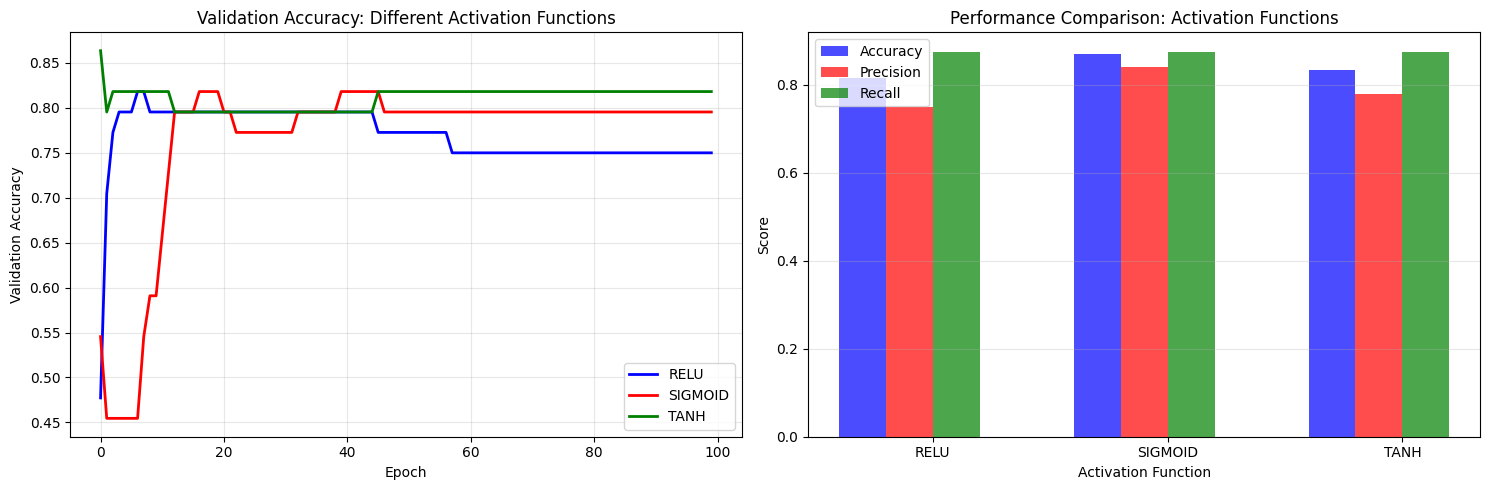


Summary - Activation Functions:
RELU: Accuracy=0.8148, F1=0.8077
SIGMOID: Accuracy=0.8704, F1=0.8571
TANH: Accuracy=0.8333, F1=0.8235


In [58]:
# Visualize activation function comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training curves
ax1 = axes[0]
colors = ['blue', 'red', 'green']
for activation, color in zip(activations, colors):
    history = activation_histories[activation]
    ax1.plot(history.history['val_accuracy'], label=f'{activation.upper()}', 
             linewidth=2, color=color)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Validation Accuracy: Different Activation Functions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Performance comparison
ax2 = axes[1]
x = np.arange(len(activations))
width = 0.2

for i, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    values = [activation_results[act][metric] for act in activations]
    ax2.bar(x + i*width, values, width, label=metric.capitalize(), 
            color=colors[i] if i < len(colors) else 'gray', alpha=0.7)

ax2.set_xlabel('Activation Function')
ax2.set_ylabel('Score')
ax2.set_title('Performance Comparison: Activation Functions')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels([a.upper() for a in activations])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Activation Functions:")
print("="*70)
for activation in activations:
    print(f"{activation.upper()}: Accuracy={activation_results[activation]['accuracy']:.4f}, "
          f"F1={activation_results[activation]['f1']:.4f}")

## 10. Experiment 5: Compare Different Batch Sizes

In [59]:
# Compare different batch sizes
batch_sizes = [16, 32, 64, 128]
batch_results = {}
batch_histories = {}
batch_times = {}

print("Training models with different batch sizes...\n")

import time

for batch_size in batch_sizes:
    print(f"Training model with batch size {batch_size}...")
    
    model = create_model_layers(
        n_layers=2,
        input_dim=X_train.shape[1],
        neurons=64,
        activation='relu',
        optimizer='adam'
    )
    
    # Time the training
    start_time = time.time()
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=batch_size,
        verbose=0
    )
    
    train_time = time.time() - start_time
    batch_times[batch_size] = train_time
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    batch_results[batch_size] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'time': train_time
    }
    batch_histories[batch_size] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}, Training Time: {train_time:.2f}s\n")

print("Experiment 5 completed!")

Training models with different batch sizes...

Training model with batch size 16...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
  Test Accuracy: 0.8148, Training Time: 13.08s

Training model with batch size 32...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
  Test Accuracy: 0.7593, Training Time: 11.19s

Training model with batch size 64...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
  Test Accuracy: 0.8148, Training Time: 9.83s

Training model with batch size 128...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
  Test Accuracy: 0.8333, Training Time: 10.29s

Experiment 5 completed!


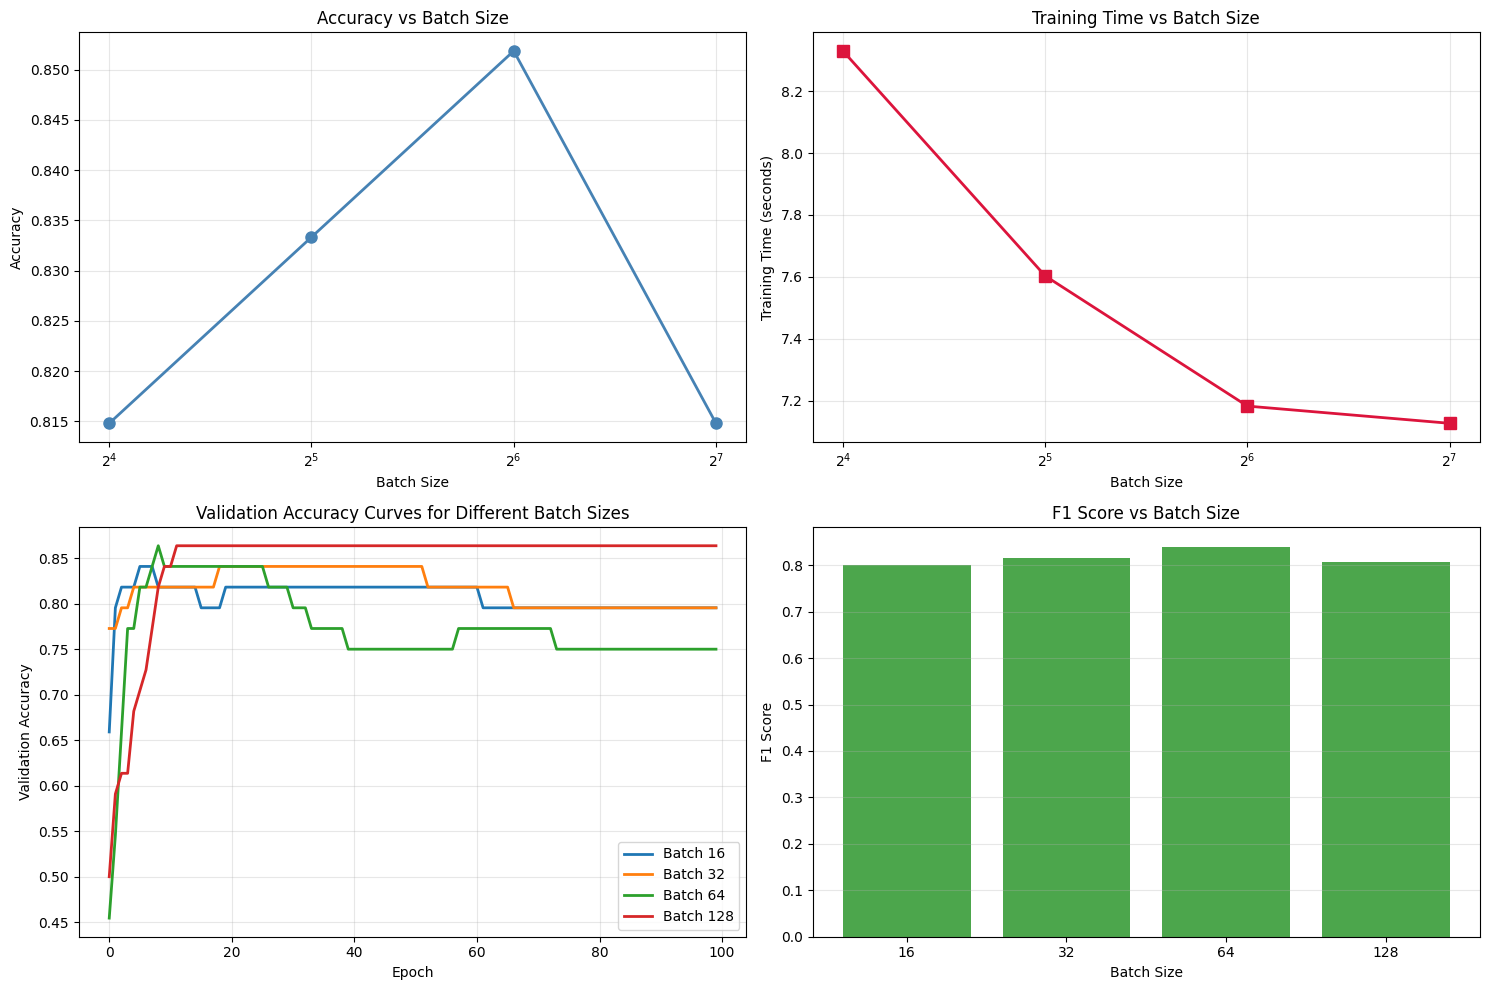


Summary - Batch Sizes:
Batch 16: Accuracy=0.8148, F1=0.8000, Time=8.33s
Batch 32: Accuracy=0.8333, F1=0.8163, Time=7.60s
Batch 64: Accuracy=0.8519, F1=0.8400, Time=7.18s
Batch 128: Accuracy=0.8148, F1=0.8077, Time=7.13s


In [35]:
# Visualize batch size comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy vs Batch Size
ax1 = axes[0, 0]
accuracies = [batch_results[bs]['accuracy'] for bs in batch_sizes]
ax1.plot(batch_sizes, accuracies, marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Batch Size')
ax1.set_xscale('log', base=2)
ax1.grid(True, alpha=0.3)

# Training Time vs Batch Size
ax2 = axes[0, 1]
times = [batch_results[bs]['time'] for bs in batch_sizes]
ax2.plot(batch_sizes, times, marker='s', linewidth=2, markersize=8, color='crimson')
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Time vs Batch Size')
ax2.set_xscale('log', base=2)
ax2.grid(True, alpha=0.3)

# Training curves for different batch sizes
ax3 = axes[1, 0]
for bs in batch_sizes:
    history = batch_histories[bs]
    ax3.plot(history.history['val_accuracy'], label=f'Batch {bs}', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Validation Accuracy')
ax3.set_title('Validation Accuracy Curves for Different Batch Sizes')
ax3.legend()
ax3.grid(True, alpha=0.3)

# F1 Score vs Batch Size
ax4 = axes[1, 1]
f1_scores = [batch_results[bs]['f1'] for bs in batch_sizes]
ax4.bar(range(len(batch_sizes)), f1_scores, color='green', alpha=0.7)
ax4.set_xlabel('Batch Size')
ax4.set_ylabel('F1 Score')
ax4.set_title('F1 Score vs Batch Size')
ax4.set_xticks(range(len(batch_sizes)))
ax4.set_xticklabels(batch_sizes)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Batch Sizes:")
print("="*70)
for bs in batch_sizes:
    print(f"Batch {bs}: Accuracy={batch_results[bs]['accuracy']:.4f}, "
          f"F1={batch_results[bs]['f1']:.4f}, Time={batch_results[bs]['time']:.2f}s")

## 11. Experiment 6: Compare Different Epoch Counts

In [36]:
# Compare different epoch counts
epoch_configs = [50, 100, 150, 200]
epoch_results = {}
epoch_histories = {}

print("Training models with different numbers of epochs...\n")

for n_epochs in epoch_configs:
    print(f"Training model for {n_epochs} epochs...")
    
    model = create_model_layers(
        n_layers=2,
        input_dim=X_train.shape[1],
        neurons=64,
        activation='relu',
        optimizer='adam'
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=n_epochs,
        batch_size=32,
        verbose=0
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    epoch_results[n_epochs] = {
        'accuracy': test_acc,
        'loss': test_loss,
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    epoch_histories[n_epochs] = history
    
    print(f"  Test Accuracy: {test_acc:.4f}\n")

print("Experiment 6 completed!")

Training models with different numbers of epochs...

Training model for 50 epochs...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
  Test Accuracy: 0.8148

Training model for 100 epochs...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 
  Test Accuracy: 0.7593

Training model for 150 epochs...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
  Test Accuracy: 0.7593

Training model for 200 epochs...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
  Test Accuracy: 0.7778

Experiment 6 completed!


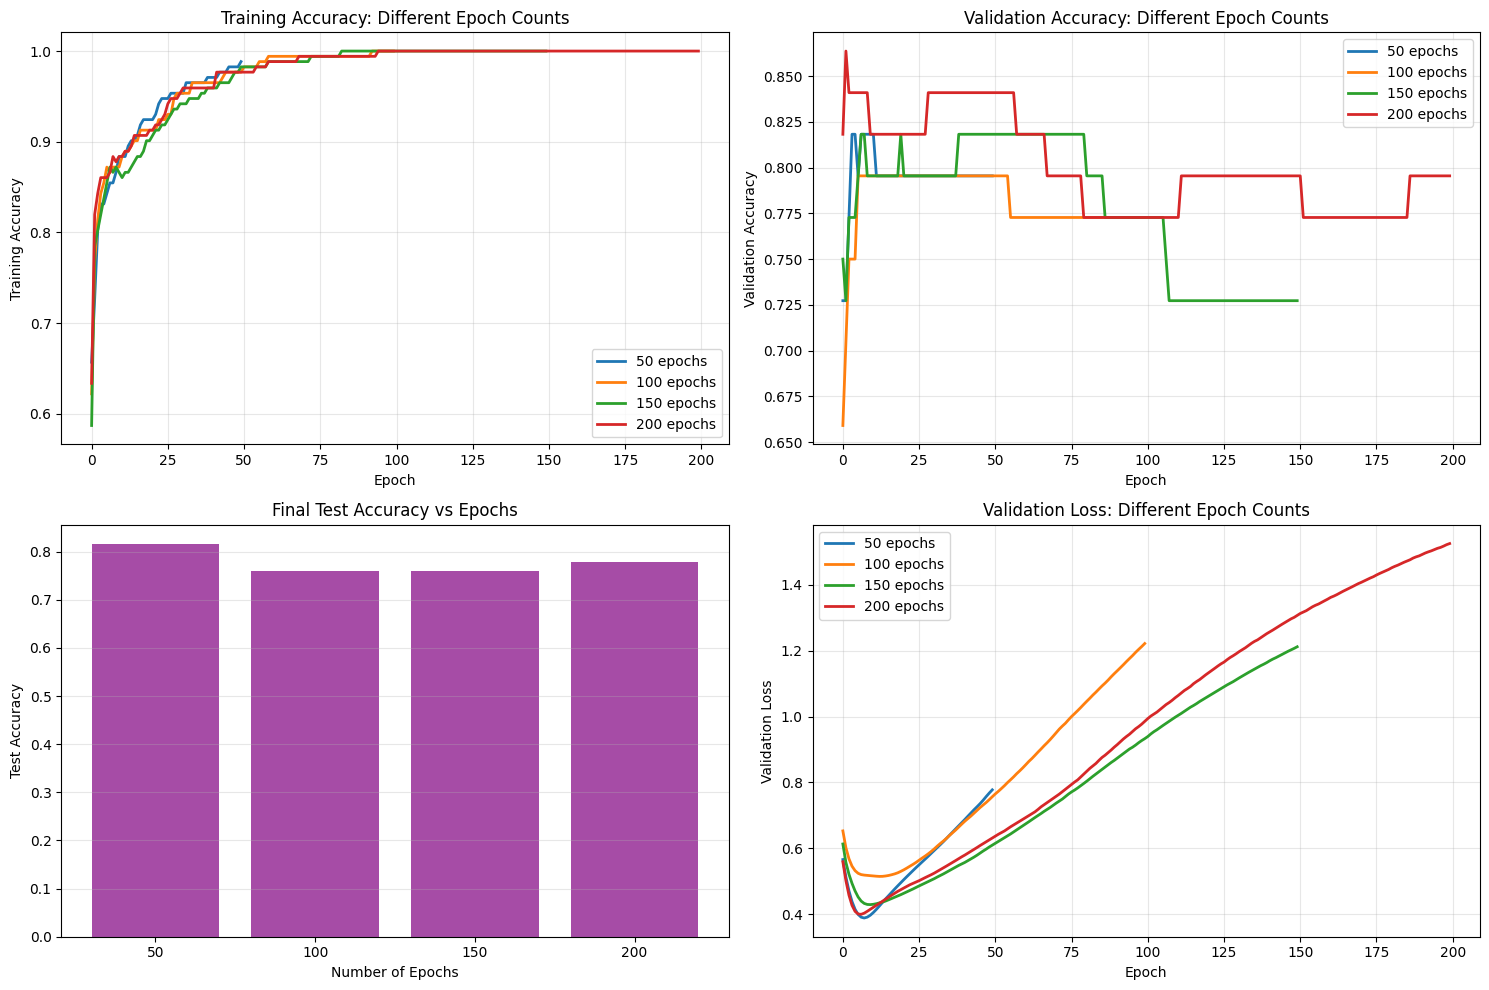


Summary - Epoch Counts:
50 epochs: Accuracy=0.8148, F1=0.8077
100 epochs: Accuracy=0.7593, F1=0.7451
150 epochs: Accuracy=0.7593, F1=0.7451
200 epochs: Accuracy=0.7778, F1=0.7692


In [37]:
# Visualize epoch comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Learning curves for all epoch configurations
ax1 = axes[0, 0]
for n_epochs in epoch_configs:
    history = epoch_histories[n_epochs]
    ax1.plot(history.history['accuracy'], label=f'{n_epochs} epochs', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Accuracy')
ax1.set_title('Training Accuracy: Different Epoch Counts')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation curves
ax2 = axes[0, 1]
for n_epochs in epoch_configs:
    history = epoch_histories[n_epochs]
    ax2.plot(history.history['val_accuracy'], label=f'{n_epochs} epochs', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Validation Accuracy: Different Epoch Counts')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Final test accuracy comparison
ax3 = axes[1, 0]
accuracies = [epoch_results[ep]['accuracy'] for ep in epoch_configs]
ax3.bar(range(len(epoch_configs)), accuracies, color='purple', alpha=0.7)
ax3.set_xlabel('Number of Epochs')
ax3.set_ylabel('Test Accuracy')
ax3.set_title('Final Test Accuracy vs Epochs')
ax3.set_xticks(range(len(epoch_configs)))
ax3.set_xticklabels(epoch_configs)
ax3.grid(axis='y', alpha=0.3)

# Loss curves
ax4 = axes[1, 1]
for n_epochs in epoch_configs:
    history = epoch_histories[n_epochs]
    ax4.plot(history.history['val_loss'], label=f'{n_epochs} epochs', linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Validation Loss')
ax4.set_title('Validation Loss: Different Epoch Counts')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary - Epoch Counts:")
print("="*70)
for n_epochs in epoch_configs:
    print(f"{n_epochs} epochs: Accuracy={epoch_results[n_epochs]['accuracy']:.4f}, "
          f"F1={epoch_results[n_epochs]['f1']:.4f}")

## 12. Comprehensive Results Comparison

In [38]:
# Create comprehensive comparison table
comparison_data = []

# Hidden Layers
for n_layers in layer_configs:
    comparison_data.append({
        'Experiment': 'Hidden Layers',
        'Configuration': f'{n_layers} layer(s)',
        'Accuracy': layer_results[n_layers]['accuracy'],
        'Precision': layer_results[n_layers]['precision'],
        'Recall': layer_results[n_layers]['recall'],
        'F1 Score': layer_results[n_layers]['f1']
    })

# Neurons per Layer
for n_neurons in neuron_configs:
    comparison_data.append({
        'Experiment': 'Layer Depth',
        'Configuration': f'{n_neurons} neurons',
        'Accuracy': neuron_results[n_neurons]['accuracy'],
        'Precision': neuron_results[n_neurons]['precision'],
        'Recall': neuron_results[n_neurons]['recall'],
        'F1 Score': neuron_results[n_neurons]['f1']
    })

# Optimizers
for opt_name in optimizers.keys():
    comparison_data.append({
        'Experiment': 'Optimizer',
        'Configuration': opt_name,
        'Accuracy': optimizer_results[opt_name]['accuracy'],
        'Precision': optimizer_results[opt_name]['precision'],
        'Recall': optimizer_results[opt_name]['recall'],
        'F1 Score': optimizer_results[opt_name]['f1']
    })

# Activation Functions
for activation in activations:
    comparison_data.append({
        'Experiment': 'Activation',
        'Configuration': activation.upper(),
        'Accuracy': activation_results[activation]['accuracy'],
        'Precision': activation_results[activation]['precision'],
        'Recall': activation_results[activation]['recall'],
        'F1 Score': activation_results[activation]['f1']
    })

# Batch Sizes
for bs in batch_sizes:
    comparison_data.append({
        'Experiment': 'Batch Size',
        'Configuration': f'Batch {bs}',
        'Accuracy': batch_results[bs]['accuracy'],
        'Precision': batch_results[bs]['precision'],
        'Recall': batch_results[bs]['recall'],
        'F1 Score': batch_results[bs]['f1']
    })

# Epochs
for n_epochs in epoch_configs:
    comparison_data.append({
        'Experiment': 'Epochs',
        'Configuration': f'{n_epochs} epochs',
        'Accuracy': epoch_results[n_epochs]['accuracy'],
        'Precision': epoch_results[n_epochs]['precision'],
        'Recall': epoch_results[n_epochs]['recall'],
        'F1 Score': epoch_results[n_epochs]['f1']
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the table
print("\n" + "="*90)
print("COMPREHENSIVE RESULTS COMPARISON")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)


COMPREHENSIVE RESULTS COMPARISON
   Experiment Configuration  Accuracy  Precision   Recall  F1 Score
Hidden Layers    1 layer(s)  0.851852   0.807692 0.875000  0.840000
Hidden Layers    2 layer(s)  0.777778   0.730769 0.791667  0.760000
Hidden Layers    3 layer(s)  0.796296   0.740741 0.833333  0.784314
Hidden Layers    4 layer(s)  0.759259   0.703704 0.791667  0.745098
  Layer Depth    16 neurons  0.777778   0.730769 0.791667  0.760000
  Layer Depth    32 neurons  0.814815   0.750000 0.875000  0.807692
  Layer Depth    64 neurons  0.796296   0.740741 0.833333  0.784314
  Layer Depth   128 neurons  0.814815   0.769231 0.833333  0.800000
    Optimizer          Adam  0.777778   0.730769 0.791667  0.760000
    Optimizer           SGD  0.814815   0.750000 0.875000  0.807692
   Activation          RELU  0.777778   0.714286 0.833333  0.769231
   Activation       SIGMOID  0.833333   0.777778 0.875000  0.823529
   Activation          TANH  0.833333   0.777778 0.875000  0.823529
   Batch Size 

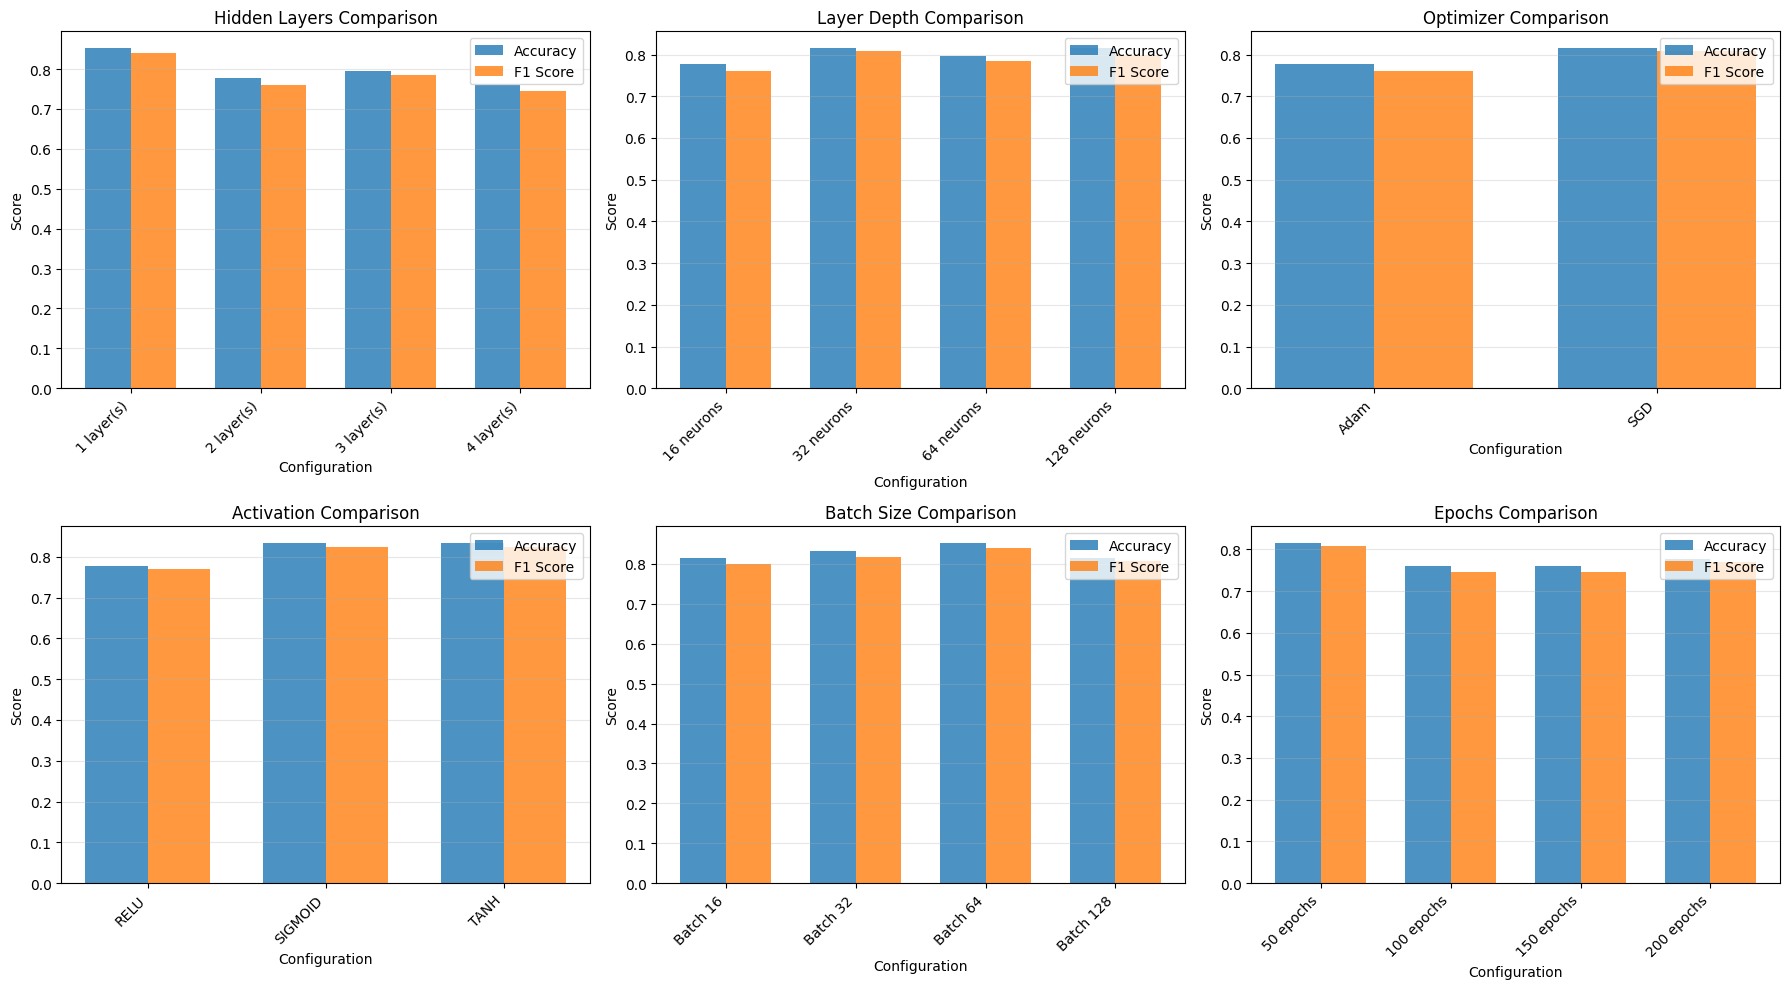

In [39]:
# Visualize overall comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

experiments = [
    ('Hidden Layers', layer_configs, layer_results, [f'{x} layer(s)' for x in layer_configs]),
    ('Layer Depth', neuron_configs, neuron_results, [f'{x} neurons' for x in neuron_configs]),
    ('Optimizer', list(optimizers.keys()), optimizer_results, list(optimizers.keys())),
    ('Activation', activations, activation_results, [a.upper() for a in activations]),
    ('Batch Size', batch_sizes, batch_results, [f'Batch {x}' for x in batch_sizes]),
    ('Epochs', epoch_configs, epoch_results, [f'{x} epochs' for x in epoch_configs])
]

for idx, (exp_name, configs, results, labels) in enumerate(experiments):
    ax = axes[idx // 3, idx % 3]
    
    accuracies = [results[config]['accuracy'] for config in configs]
    f1_scores = [results[config]['f1'] for config in configs]
    
    x = np.arange(len(configs))
    width = 0.35
    
    ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
    ax.bar(x + width/2, f1_scores, width, label='F1 Score', alpha=0.8)
    
    ax.set_xlabel('Configuration')
    ax.set_ylabel('Score')
    ax.set_title(f'{exp_name} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Best Model Selection and Final Evaluation

In [42]:
# Find best configuration from each experiment
best_configs = {}

best_layers = max(layer_configs, key=lambda x: layer_results[x]['accuracy'])
best_configs['layers'] = (best_layers, layer_results[best_layers]['accuracy'])

best_neurons = max(neuron_configs, key=lambda x: neuron_results[x]['accuracy'])
best_configs['neurons'] = (best_neurons, neuron_results[best_neurons]['accuracy'])

best_optimizer = max(optimizers.keys(), key=lambda x: optimizer_results[x]['accuracy'])
best_configs['optimizer'] = (best_optimizer, optimizer_results[best_optimizer]['accuracy'])

best_activation = max(activations, key=lambda x: activation_results[x]['accuracy'])
best_configs['activation'] = (best_activation, activation_results[best_activation]['accuracy'])

best_batch = max(batch_sizes, key=lambda x: batch_results[x]['accuracy'])
best_configs['batch_size'] = (best_batch, batch_results[best_batch]['accuracy'])

best_epochs = max(epoch_configs, key=lambda x: epoch_results[x]['accuracy'])
best_configs['epochs'] = (best_epochs, epoch_results[best_epochs]['accuracy'])

print("\n" + "="*70)
print("BEST CONFIGURATIONS FROM EACH EXPERIMENT")
print("="*70)
for key, (config, acc) in best_configs.items():
    print(f"{key.capitalize():15s}: {str(config):20s} (Accuracy: {acc:.4f})")
print("="*70)


BEST CONFIGURATIONS FROM EACH EXPERIMENT
Layers         : 1                    (Accuracy: 0.8519)
Neurons        : 32                   (Accuracy: 0.8148)
Optimizer      : SGD                  (Accuracy: 0.8148)
Activation     : sigmoid              (Accuracy: 0.8333)
Batch_size     : 64                   (Accuracy: 0.8519)
Epochs         : 50                   (Accuracy: 0.8148)


In [41]:
# Train best overall model with optimal configurations
print("\nTraining final model with best configurations...\n")

best_model = create_model_layers(
    n_layers=best_configs['layers'][0],
    input_dim=X_train.shape[1],
    neurons=best_configs['neurons'][0],
    activation=best_configs['activation'][0],
    optimizer=best_configs['optimizer'][0]
)

# Train with best batch size and epochs
final_history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=best_configs['epochs'][0],
    batch_size=best_configs['batch_size'][0],
    verbose=1
)

print("\nFinal model training completed!")


Training final model with best configurations...

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4186 - loss: 0.9038 - val_accuracy: 0.5455 - val_loss: 0.7633
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4186 - loss: 0.8753 - val_accuracy: 0.5455 - val_loss: 0.7480
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4186 - loss: 0.8497 - val_accuracy: 0.5455 - val_loss: 0.7348
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4186 - loss: 0.8269 - val_accuracy: 0.5455 - val_loss: 0.7235
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4186 - loss: 0.8065 - val_accuracy: 0.5455 - val_loss: 0.7139
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4186 - loss: 0.7885 - val_accuracy: 0.5455 - val_loss: 0.7058
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4186 - loss: 0.7724 - val_accuracy: 0.5455 - val_loss: 0.6990
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4244 - loss

In [43]:
# Evaluate best model on test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n" + "="*70)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*70)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("="*70)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7222 - loss: 0.6221
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

FINAL MODEL EVALUATION ON TEST SET
Test Loss: 0.6221
Test Accuracy: 0.7222

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.67      1.00      0.80        30
     Disease       1.00      0.38      0.55        24

    accuracy                           0.72        54
   macro avg       0.83      0.69      0.67        54
weighted avg       0.81      0.72      0.69        54



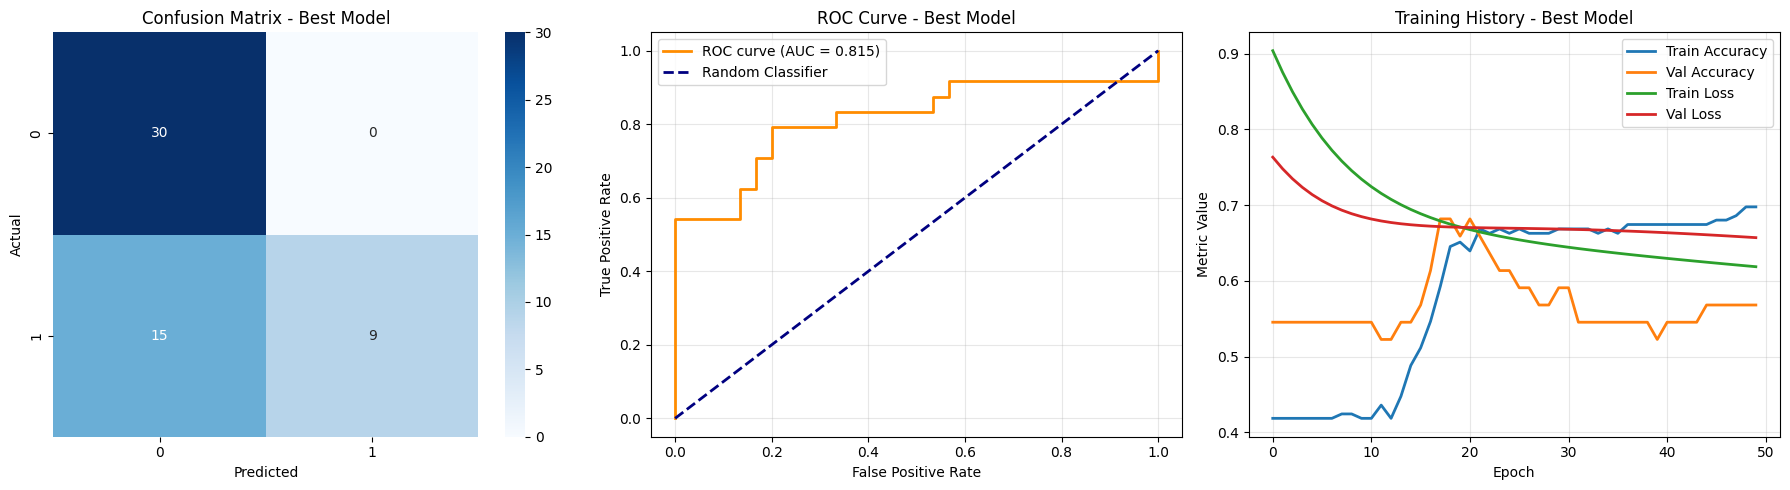

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix - Best Model')

# ROC Curve
ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--', label='Random Classifier')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Best Model')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training History
ax3 = axes[2]
ax3.plot(final_history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax3.plot(final_history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
ax3.plot(final_history.history['loss'], label='Train Loss', linewidth=2)
ax3.plot(final_history.history['val_loss'], label='Val Loss', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Metric Value')
ax3.set_title('Training History - Best Model')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Key Findings and Recommendations

In [45]:
# Summary of findings
print("\n" + "="*70)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("="*70)

print("\n1. NUMBER OF HIDDEN LAYERS:")
print(f"   - Best: {best_configs['layers'][0]} layer(s) with {best_configs['layers'][1]:.4f} accuracy")
print("   - More layers don't always mean better performance")
print("   - Risk of overfitting with too many layers on this dataset")

print("\n2. LAYER DEPTH (NEURONS PER LAYER):")
print(f"   - Best: {best_configs['neurons'][0]} neurons with {best_configs['neurons'][1]:.4f} accuracy")
print("   - Sweet spot found between underfitting and overfitting")
print("   - More neurons increase model capacity but also training time")

print("\n3. OPTIMIZATION ALGORITHM:")
print(f"   - Best: {best_configs['optimizer'][0]} with {best_configs['optimizer'][1]:.4f} accuracy")
print("   - Adam generally converges faster than SGD")
print("   - Adaptive learning rates help with this type of problem")

print("\n4. ACTIVATION FUNCTION:")
print(f"   - Best: {best_configs['activation'][0].upper()} with {best_configs['activation'][1]:.4f} accuracy")
print("   - ReLU typically performs well for hidden layers")
print("   - Avoids vanishing gradient problem")

print("\n5. BATCH SIZE:")
print(f"   - Best: Batch size {best_configs['batch_size'][0]} with {best_configs['batch_size'][1]:.4f} accuracy")
print("   - Trade-off between training speed and model performance")
print("   - Smaller batches provide more frequent updates")

print("\n6. NUMBER OF EPOCHS:")
print(f"   - Best: {best_configs['epochs'][0]} epochs with {best_configs['epochs'][1]:.4f} accuracy")
print("   - More epochs allow better convergence")
print("   - Monitor for overfitting with validation curves")

print("\n" + "="*70)
print("FINAL RECOMMENDATION:")
print("="*70)
print(f"Optimal Configuration:")
print(f"  - Hidden Layers: {best_configs['layers'][0]}")
print(f"  - Neurons per Layer: {best_configs['neurons'][0]}")
print(f"  - Activation: {best_configs['activation'][0].upper()}")
print(f"  - Optimizer: {best_configs['optimizer'][0]}")
print(f"  - Batch Size: {best_configs['batch_size'][0]}")
print(f"  - Epochs: {best_configs['epochs'][0]}")
print(f"  - Test Accuracy: {test_acc:.4f}")
print(f"  - AUC-ROC: {roc_auc:.4f}")
print("="*70)


KEY FINDINGS AND RECOMMENDATIONS

1. NUMBER OF HIDDEN LAYERS:
   - Best: 1 layer(s) with 0.8519 accuracy
   - More layers don't always mean better performance
   - Risk of overfitting with too many layers on this dataset

2. LAYER DEPTH (NEURONS PER LAYER):
   - Best: 32 neurons with 0.8148 accuracy
   - Sweet spot found between underfitting and overfitting
   - More neurons increase model capacity but also training time

3. OPTIMIZATION ALGORITHM:
   - Best: SGD with 0.8148 accuracy
   - Adam generally converges faster than SGD
   - Adaptive learning rates help with this type of problem

4. ACTIVATION FUNCTION:
   - Best: SIGMOID with 0.8333 accuracy
   - ReLU typically performs well for hidden layers
   - Avoids vanishing gradient problem

5. BATCH SIZE:
   - Best: Batch size 64 with 0.8519 accuracy
   - Trade-off between training speed and model performance
   - Smaller batches provide more frequent updates

6. NUMBER OF EPOCHS:
   - Best: 50 epochs with 0.8148 accuracy
   - More e

Baseline Neural Network Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)